In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 500
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data = pd.read_csv("movies_complete.csv")

In [4]:
#Ahh the traditions, lets view the data frame. Just five rows to get feel for it
data.head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


#### Viewing the head of the data frame didn't tell me much about it. Pandas has this amazing method(.info) which gives the overview of the data frame. 
#### Let us see how that can help us

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

</h1> There are quite a bit of missing values in the data. Nothing to worry, pandas got us covered, it handles missing values
elegantly </h1>

In [18]:
#Let us see the missing values in detail
data.isnull().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
dtype: int64

####  We can observed missing values in lot of variables. If you see budget_musd,revenue_musd, there can be no film with zero budget and zero revenue, unless they are filmed with a mobile in vertical format at 144p :)
#### These missing values can be missing at random or completely missing at random
#### Here's a nice article explaining the differences between them 
#### (https://medium.com/@danberdov/types-of-missing-data-902120fa4248). 
#### We will get into that in the later part of analysis like do the missing values have any relation with year of release etc..
#### In this kernel we will mostly focus on derving insights from our data rather than preparing it for a model which is a later step in the process.
#### We will ask some relevant questions here and try to answer them through our analysis. Let's move forward now, i might have bored you to death here

In [7]:
data.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


#### From describe method we can see that min budget value is 'ZERO' and maximum is 380 million. Well there are movies with zero budget.
#### However, there are movies with zero revenue as well, we have to explore and see what this sero budget and revenue means. Is it a typo error? did the release?
#### How many movies are there with this values. You can also see the statistical explanations for different variables here
#### The mean budget is around 21.67 usd millions. The median budget is 8.20 usd millions. Wow, there's a great difference between mean and median here. 
#### It is possible that data is skewed with data points with high budget 
#### Let us see some distribution plots to see how data is distributed

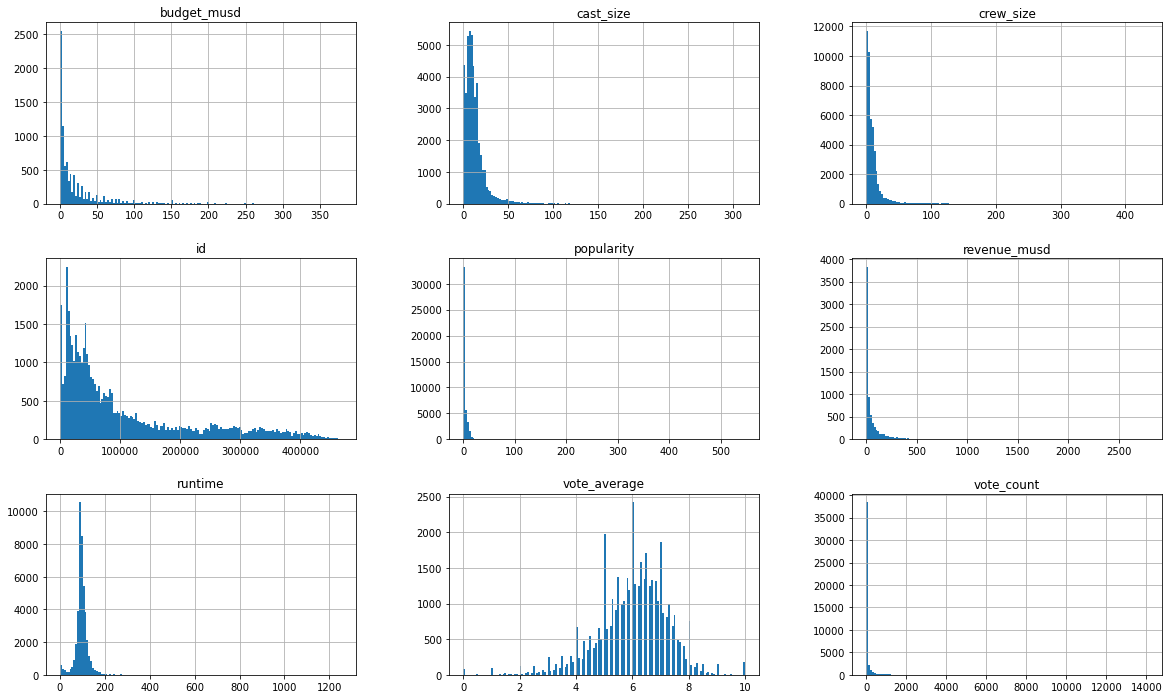

In [13]:
data.hist(figsize=(20,12),bins = 150)
plt.show()

#### In the above plots one of our assumptions was proved to be true. The high difference between mean and median budget is mostly because of the highly skewed data towards right which indicated that there are movies with hig budget  and revenues which are causing the mean to shift towards rigth. It's like Bill gates sitting in a room full of data analysts and all of a sudden the room's average salary went to unexpected numbers. I wish this could be true in real life :)

#### Let us view the categorical data basic stats like counts, unique values, frequency counts etc..
#### Pandas .describe() method allows that with 'include' parameter

In [21]:
data.describe(include = 'object')

,title,tagline,release_date,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,44657,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,17225,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,2008-01-01,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,133,4935,29,31755,741,17723,3,22189,3,24,66


#### We got some interesting observations, didn't we??

#### Movies with name Cinderella has the highest count. Okay, is that because of duplicates or are there multiple movies across different time frames.

#### Based on true stroy is the highest repeated tagline. Well, lot of inspiration in this world :)

#### MGM produced most number of movies, while John Ford directed most number of movies.

#### Let us analyze Cinderella movies to confirm wether they are duplicates or not

In [22]:
data[data.title == 'Cinderella']

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,nan,nan,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,nan,nan,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,nan,nan,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,nan,nan,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,nan,nan,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,nan,nan,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,nan,nan,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,nan,nan,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


#### Well, Cinderella doesn't have any duplicates. We can observe movies are released across timeframes in different languages and genres with different directors and cast

#### Okay, Let us imagine you are afilm Journalist/blogger looking for content from this data. What Questions do you ask?

#### Let us go from basics to more advanced analysis later on. For the basic part we can answer the following questions

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

#### Let us now subset the data that we need to answer these basic questions.

1. What __Data__ do we need to answer these questions?

#### Let us now subset the data that we need to answer these basic questions.
1. What __Data__ do we need to answer these questions?
#### For profit we need to calculate the difference between revenue and budget
#### For ROI we need to calculate the budget/revenue. 
#### If ROI == 1 there is no return on investement. Producer should have invested in Real Estate
#### If > 1, hooray, the movie made some profits. What next, Ferrari??
#### If < 1, Well, get ready to blame the director.

In [26]:
data.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,Profit_musd,ROI_musd
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,343.55,12.45
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,197.80,4.04
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,nan,nan


In [24]:
data['Profit_musd'] = data.revenue_musd.sub(data.budget_musd)

data['ROI_musd'] = data.revenue_musd.div(data.budget_musd)

#### It's time to investigate the data to answer our few basic questions

In [ ]:
##Movies Top 5 - Average Rating

In [28]:
data.sort_values(by = "vote_average", ascending = False).head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,Profit_musd,ROI_musd
36996,162611,Portrait of a Young Man in Three Movements,NaN,1931-04-15,NaN,NaN,en,nan,nan,NaN,NaN,1.00,10.00,0.04,54.00,This is a non-narrative film comprised mostly ...,NaN,NaN,NaN,0,1,Henwar Rodakiewicz,nan,nan
33891,143980,Brave Revolutionary,NaN,1994-07-22,NaN,NaN,hi,nan,nan,NaN,India,1.00,10.00,0.32,159.00,Lack-lustred and alcoholic Pratap Narayan Tila...,हिन्दी,<img src='http://image.tmdb.org/t/p/w185//zAb2...,Nana Patekar|Dimple Kapadia|Atul Agnihotri|Mam...,27,9,Mehul Kumar,nan,nan
1615,64562,Other Voices Other Rooms,NaN,1995-09-15,Drama,NaN,en,nan,nan,NaN,NaN,1.00,10.00,0.04,nan,Truman Capote's semi-autobiographical first no...,NaN,<img src='http://image.tmdb.org/t/p/w185//4ifP...,Anna Levine,1,0,NaN,nan,nan
35505,211139,The Lion of Thebes,NaN,1964-06-27,Drama|Action|Adventure,NaN,en,nan,nan,La Société des Films Sirius,France|Italy,1.00,10.00,1.78,89.00,"Fleeing Troy in the wake of its destruction, f...",Italiano|Español,<img src='http://image.tmdb.org/t/p/w185//tdOc...,Mark Forest|Yvonne Furneaux|Massimo Serato|Pie...,7,10,Giorgio Ferroni,nan,nan
25882,287299,Katt Williams: Priceless: Afterlife,"Everybody has a price, because if you didn't y...",2014-08-16,TV Movie|Comedy,NaN,en,nan,nan,New Wave Entertainment Television,United States of America,2.00,10.00,0.48,58.00,Katt Williams performs in an all-new stand-up ...,English,<img src='http://image.tmdb.org/t/p/w185//wKrH...,Katt Williams|Phedra Syndelle|Christina Ingram...,4,2,Spike Lee,nan,nan


#### Well we can see the data is being sorted to get the first five highest average rated movies
#### But, there is a problem here. If we see the number votes on which the average is calculated, this method appears to be dumb.
#### So, now let us start filtering our data to make our analysis dependable
#### Consider average voting if the number of votes are greater than 10
#### Let us fill missing values with zeros

In [36]:
data[['title','vote_count','vote_average']].fillna(0,inplace = True)

D:\InstallationFolder\Anaconda\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [37]:
data[['title','vote_count','vote_average']].sort_values(by = "vote_average", ascending = False).loc[data['vote_count'] > 10].head(5)

,title,vote_count,vote_average
42626,Planet Earth II,50.00,9.50
18462,The Civil War,15.00,9.20
10233,Dilwale Dulhania Le Jayenge,661.00,9.10
42822,Cosmos,41.00,9.10
38323,Bruce Lee: The Legend,19.00,8.90


#### Now, it appears our analysis is going in right direction

#### Let us see some lowest rated movies

In [38]:
data[['title','vote_count','vote_average']].sort_values(by = "vote_average", ascending = True).loc[data['vote_count'] > 10].head(5)

,title,vote_count,vote_average
41602,Call Me by Your Name,18.00,0.00
25418,Santa Claus,12.00,1.60
7030,The Beast of Yucca Flats,18.00,1.60
32437,Saving Christmas,25.00,1.70
43502,The Wild World of Batwoman,12.00,1.80


#### Oh no, Santa Claus is dissapointed :(

#### Ok now it's becoming tedious to write the filtering code everytime
#### Let us write a function for this and use it overtime
#### Let us fill na's in the derived columns and parent columns of those derived

In [39]:
data[['Profit_musd','ROI_musd','revenue_musd','budget_musd']].fillna(0,inplace = True)

D:\InstallationFolder\Anaconda\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
Highest Revenue
Highest Budget
Highest Profit (=Revenue - Budget)
Lowest Profit (=Revenue - Budget)
Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
Highest number of Votes
Highest Rating (only movies with 10 or more Ratings)
Lowest Rating (only movies with 10 or more Ratings)
Highest Popularity

In [78]:
def analyse_data(data,column,option = False,filter_column = None,filter_condition = None,n = 5):
    
    """
    data: Data Frame
    column: Column that should be sorted and displayed
    option: True or False
    filter_column: Column on which the filter should be applied
    filter_condition: Number - A number as a condition
    n : number of rows to be displayed
    """
    if (filter_column == None) and (filter_condition == None):
        return data[["title",column]].sort_values(by = column, ascending = option).head(n).reset_index(drop = True)
    else:
        return data[["title",column]].sort_values(by = column, ascending = option).loc[data[filter_column] >= filter_condition].head(n).reset_index(drop = True)
    

In [79]:
#Highest Rating

analyse_data(data,'vote_average',option = False,filter_column = 'vote_count',filter_condition = 10, n = 5)

,title,vote_average
0,As I Was Moving Ahead Occasionally I Saw Brief...,9.50
1,Planet Earth II,9.50
2,The Civil War,9.20
3,Dilwale Dulhania Le Jayenge,9.10
4,Cosmos,9.10


In [80]:
#Lowest Rating

analyse_data(data,'vote_average',option = True,filter_column = 'vote_count',filter_condition = 10, n = 5)

,title,vote_average
0,Extinction: Nature Has Evolved,0.00
1,How to Talk to Girls at Parties,0.00
2,Call Me by Your Name,0.00
3,Santa Claus,1.60
4,The Beast of Yucca Flats,1.60


In [81]:
#Highest Popularity

analyse_data(data,'popularity', n = 5)

,title,popularity
0,Minions,547.49
1,Wonder Woman,294.34
2,Beauty and the Beast,287.25
3,Baby Driver,228.03
4,Big Hero 6,213.85


In [82]:
#Highest Revenue
analyse_data(data,'revenue_musd', n = 5)

,title,revenue_musd
0,Avatar,2787.97
1,Star Wars: The Force Awakens,2068.22
2,Titanic,1845.03
3,The Avengers,1519.56
4,Jurassic World,1513.53


In [83]:
#Highest Budget
analyse_data(data,'budget_musd', n = 5)

,title,budget_musd
0,Pirates of the Caribbean: On Stranger Tides,380.00
1,Pirates of the Caribbean: At World's End,300.00
2,Avengers: Age of Ultron,280.00
3,Superman Returns,270.00
4,John Carter,260.00


In [84]:
#Highest Profit

analyse_data(data,'Profit_musd', n = 5)

,title,Profit_musd
0,Avatar,2550.97
1,Star Wars: The Force Awakens,1823.22
2,Titanic,1645.03
3,Jurassic World,1363.53
4,Furious 7,1316.25


In [85]:
#Lowest Profit
analyse_data(data,'Profit_musd', n = 5,option = True)

,title,Profit_musd
0,The Lone Ranger,-165.71
1,The Alamo,-119.18
2,Mars Needs Moms,-111.01
3,Valerian and the City of a Thousand Planets,-107.45
4,The 13th Warrior,-98.30


In [93]:
#Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
 
analyse_data(data,'ROI_musd',filter_column = "budget_musd",filter_condition = 10, n = 5)

,title,ROI_musd
0,E.T. the Extra-Terrestrial,75.52
1,Star Wars,70.49
2,Pretty Woman,33.07
3,The Intouchables,32.81
4,The Empire Strikes Back,29.91


In [94]:
#Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
analyse_data(data,'ROI_musd',filter_column = "budget_musd",filter_condition = 100, n = 5,option = True)

,title,ROI_musd
0,The Adventures of Pluto Nash,0.07
1,The Alamo,0.18
2,Live by Night,0.21
3,Mars Needs Moms,0.26
4,The Lone Ranger,0.35


In [96]:
#Highest number of Votes
analyse_data(data,'vote_count',n = 5)

,title,vote_count
0,Inception,14075.00
1,The Dark Knight,12269.00
2,Avatar,12114.00
3,The Avengers,12000.00
4,Deadpool,11444.00


#### Christopher Nolan is unbeatable here!!

#### You can change the filtering condition number and derive more insights(eg:- ROI of movies with budget above 200 musd, ROI for movies below 50 musd budget)